# California House Price Prediction

In [2]:
#Let's kick things off by importing all the needed packages and libraries

#Importing packages for getting data ready and preprocessing
import pandas as pd
import numpy as np


#Importing packages for modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

#Importing packages for visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

We will be using the california dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [3]:
# Getting the california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Next, we are going to convert our dataset to a dataframe with the feature_names as our columns

In [5]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Looks good! Now let's add the 'target' column in the housing dataset to our dataframe

In [6]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
housing_df['MedHouseVal'] = housing_df.target
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [8]:
import pandas as pd
import numpy as np

def floor_and_ceil_columns(df, column_to_floor, column_to_ceil):
    """
    Floors the values in one column and ceils the values in another column of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    column_to_floor (str): The name of the column to floor.
    column_to_ceil (str): The name of the column to ceil.

    Returns:
    pd.DataFrame: The modified DataFrame with floored and ceiled values.
    """
    if column_to_floor in df.columns:
        df[column_to_floor] = np.floor(df[column_to_floor])
    else:
        raise KeyError(f"Column '{column_to_floor}' not found in DataFrame.")

    if column_to_ceil in df.columns:
        df[column_to_ceil] = np.ceil(df[column_to_ceil])
    else:
        raise KeyError(f"Column '{column_to_ceil}' not found in DataFrame.")

    return df


In [10]:
# Apply the function
result = floor_and_ceil_columns(housing_df, 'AveRooms', 'AveBedrms')

print(result)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0       6.0        2.0       322.0  2.555556     37.88   
1      8.3014      21.0       6.0        1.0      2401.0  2.109842     37.86   
2      7.2574      52.0       8.0        2.0       496.0  2.802260     37.85   
3      5.6431      52.0       5.0        2.0       558.0  2.547945     37.85   
4      3.8462      52.0       6.0        2.0       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0       5.0        2.0       845.0  2.560606     39.48   
20636  2.5568      18.0       6.0        2.0       356.0  3.122807     39.49   
20637  1.7000      17.0       5.0        2.0      1007.0  2.325635     39.43   
20638  1.8672      18.0       5.0        2.0       741.0  2.123209     39.43   
20639  2.3886      16.0       5.0        2.0      1387.0  2.616981     39.37   

       Longitude  target  MedHouseVal  

In [11]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,4.933818,1.801599,1425.476744,3.070655,35.631861,-119.569704,2.068558,2.068558
std,1.899822,12.585558,2.489414,0.615487,1132.462122,10.386050,2.135952,2.003532,1.153956,1.153956
min,0.499900,1.000000,0.000000,1.000000,3.000000,0.692308,32.540000,-124.350000,0.149990,0.149990
25%,2.563400,18.000000,4.000000,2.000000,787.000000,2.429741,33.930000,-121.800000,1.196000,1.196000
50%,3.534800,29.000000,5.000000,2.000000,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.797000
75%,4.743250,37.000000,6.000000,2.000000,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.647250
max,15.000100,52.000000,141.000000,35.000000,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000010


Let's check the length of our dataframe

In [12]:
len(housing_df)

20640

In [13]:
housing_df = housing_df.drop(columns=['target'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.0,2.0,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.0,1.0,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.0,2.0,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.0,2.0,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.0,2.0,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.0,2.0,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.0,2.0,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.0,2.0,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.0,2.0,741.0,2.123209,39.43,-121.32,0.847


In [14]:
housing_df['MedHouseVal'] = housing_df['MedHouseVal'] * 100000
housing_df['MedHouseVal']

,MedHouseVal
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [15]:
new_df = housing_df.head(500)
new_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.0,2.0,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.0,1.0,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.0,2.0,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.0,2.0,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.0,2.0,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
495,5.3794,52.0,6.0,2.0,1316.0,2.230508,37.86,-122.25,376900.0
496,3.2619,52.0,4.0,2.0,1508.0,1.997351,37.85,-122.26,309600.0
497,2.7054,52.0,5.0,2.0,1800.0,2.208589,37.85,-122.27,182300.0
498,2.2431,47.0,6.0,2.0,719.0,2.205521,37.85,-122.27,172700.0


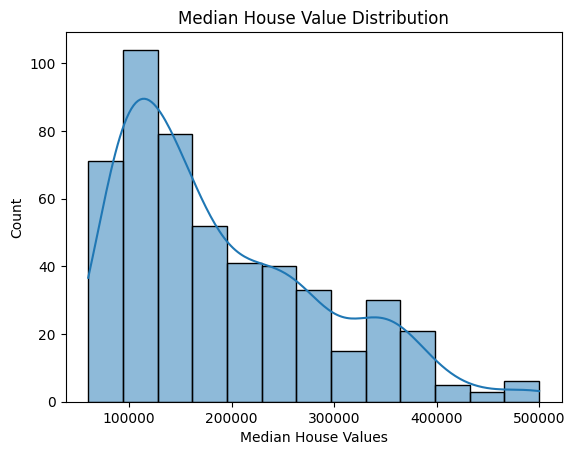

In [16]:
sns.histplot(new_df['MedHouseVal'], kde=True)
plt.title('Median House Value Distribution')
plt.xlabel('Median House Values')
plt.show()

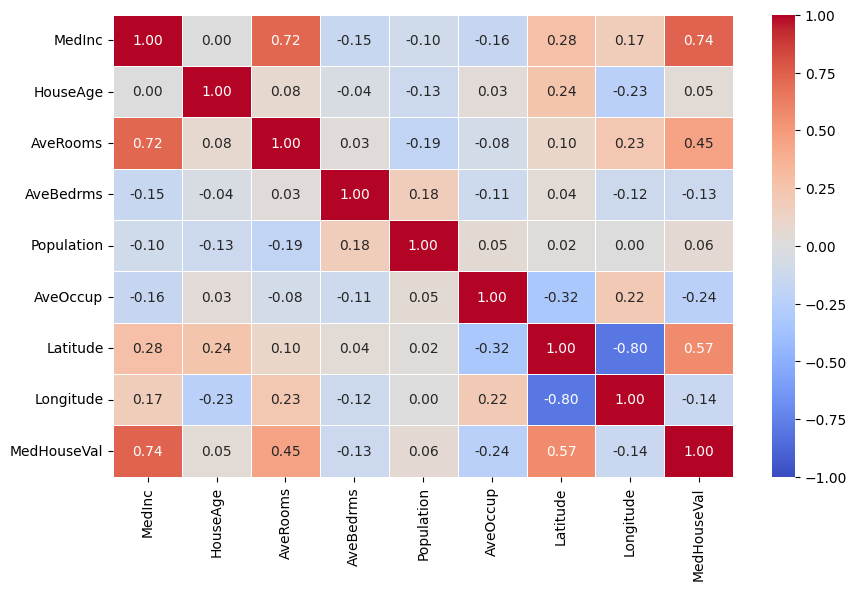

In [17]:
# Visualizing the correlation matrix of our data
corr_matrix = new_df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="coolwarm",
                vmin=-1, vmax=1);

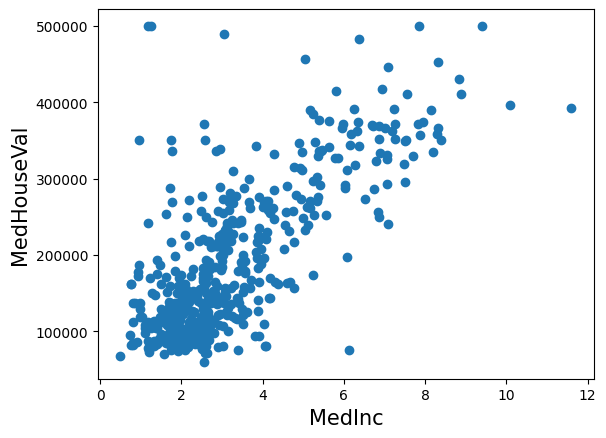

In [18]:
plt.scatter(data=new_df, x="MedInc", y="MedHouseVal")
plt.xlabel('MedInc', fontsize=15)
plt.ylabel('MedHouseVal', fontsize=15);

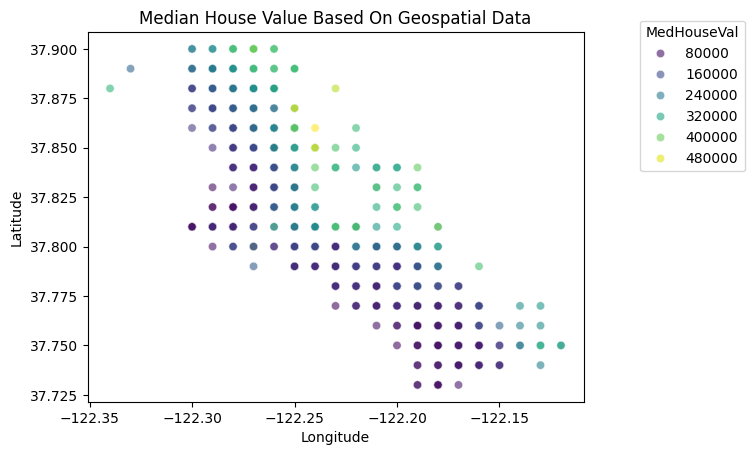

In [19]:
sns.scatterplot(data=new_df, x="Longitude", y="Latitude", hue='MedHouseVal', palette='viridis', alpha=0.6)
plt.legend(title= 'MedHouseVal', bbox_to_anchor = (1.10, 1.05), loc='upper left')
plt.title('Median House Value Based On Geospatial Data');

Next, we are going to train a model and score it using the Ridge estimator

In [20]:
# Defining X and y
X = new_df.drop("MedHouseVal", axis = 1)
y = new_df["MedHouseVal"]

In [21]:
# Splitting into train and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
# First of all, Let us try the Ridge Regression algorithm

np.random.seed(42)

# Instantiating and fitting the Ridge model (on the training set)
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Checking the score of our model (on the test set)
ridge_model.score(X_test, y_test)

0.66723630880984

In [23]:
# Next, let us try the LinearRegression algorithm

# Setting up random seed
np.random.seed(42)

# Fitting LinearRegression model (on the training set)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Checking the score of our model (on the test set)
linear_model.score(X_test, y_test)

0.7225041086626078

In [24]:
# Finally, let us try the RandomForest Regressor algorithm

# Setting up random seed
np.random.seed(42)

# Fitting RandomForest model (on the training set)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Checking the score of our model (on the test set)
rf_model.score(X_test, y_test)

0.7732013199220028

In [25]:
# Selecting the best model
best_model = rf_model
best_model

RandomForestRegressor()

In [26]:
# Making predictions
y_pred = best_model.predict(X_test)
y_pred

array([158029.  ,  98512.  , 278513.  , 187936.  , 244831.05, 143356.  ,
        83859.  , 254621.05, 214088.  , 230688.  , 113400.  , 111742.  ,
       200029.  , 141234.  , 122615.  ,  84849.  , 203873.  , 163536.  ,
       387394.16, 126495.  , 141306.07, 260876.  , 144930.  , 246142.  ,
       201450.  , 176941.  , 132332.  , 251101.  , 232123.  , 193253.  ,
       248982.  , 352128.  , 365532.02, 112336.  , 126250.  , 222737.07,
        88434.  , 177883.  , 125916.  , 121861.  ,  79860.  , 152558.  ,
       397232.13, 198245.  , 127394.  , 409138.3 , 124430.  ,  97556.  ,
       365945.02, 245012.  , 100327.  , 110451.  ,  85895.  , 229832.  ,
       361090.06, 219234.  , 122197.  , 126130.  , 199907.  ,  93024.  ,
       103641.  , 152168.  , 218245.  , 279107.  , 140405.  ,  98219.03,
       231287.  , 159320.  , 257629.  , 158972.  , 322595.  ,  89302.  ,
        83410.  , 170664.  , 121567.  , 289540.03, 122959.  , 214707.  ,
       332604.  ,  93157.  ,  89090.  , 137061.  , 

In [27]:
len(y_pred)

125

In [28]:
# Savingvthe model
import pickle

pickle.dump(best_model, open('rfreg.pkl', 'wb'))

In [30]:
# Loading the model
loaded_model = pickle.load(open("rfreg.pkl", "rb"))

### Evaluation

We are going to use the following to evaluate our model:

1. R^2 (pronounced r-squared) or coefficient of determination

2. Mean Absolute Error(MAE)

3. Mean Squared Error (MSE)

#### 1. r2_score/R-Squared/coefficient of determination

**What R-squared does:** It compares your model's predictions to the mean targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers, its R^2 score would be 1.

In [31]:
loaded_model.score(X_test, y_test)

0.7732013199220028

In [32]:
# Making predictions on our loaded model
y_preds = loaded_model.predict(X_test)

#### 2. Mean Absolute Error (MAE)

**MAE** is the average of the absolute difference between predictions and actual values

It gives you an idea of how wrong your model's predictions are.

In [33]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_preds)
mae

29024.16032

In [34]:
df = pd.DataFrame(data = {"actual values": y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"]- df["actual values"]
df.head(10)

,actual values,predicted values,differences
90,162500.0,158029.00,-4471.00
254,102400.0,98512.00,-3888.00
283,371000.0,278513.00,-92487.00
445,185600.0,187936.00,2336.00
461,241700.0,244831.05,3131.05
15,140000.0,143356.00,3356.00
316,70000.0,83859.00,13859.00
489,489600.0,254621.05,-234978.95
159,243800.0,214088.00,-29712.00
153,314700.0,230688.00,-84012.00


In [35]:
df["differences"].mean()

-46.582880000000124

In [36]:
np.abs(df["differences"]).mean()

29024.16032

#### 3. Mean Squared Error (MSE)

**MSE** is the mean of the square of errors between actual and predicted values.

In [37]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_preds)
mse

2185826181.1332

In [38]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
90,162500.0,158029.00,-4471.00,1.998984e+07
254,102400.0,98512.00,-3888.00,1.511654e+07
283,371000.0,278513.00,-92487.00,8.553845e+09
445,185600.0,187936.00,2336.00,5.456896e+06
461,241700.0,244831.05,3131.05,9.803474e+06


In [39]:
# Calculating MSE by hand
squared = np.square(df["differences"])
squared.mean()

2185826181.1332

In [40]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16
df_large_error.head()

,actual values,predicted values,differences,squared_differences
90,162500.0,158029.00,-4471.00,1.600000e+01
254,102400.0,98512.00,-3888.00,1.511654e+07
283,371000.0,278513.00,-92487.00,8.553845e+09
445,185600.0,187936.00,2336.00,5.456896e+06
461,241700.0,244831.05,3131.05,9.803474e+06


In [41]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

2185666262.5332003

In [42]:
# Our data frame is not accurate but it is just for example purposes
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
90,162500.0,158029.0,-4471.0,1.600000e+01
254,20.0,20.0,20.0,2.000000e+01
283,20.0,20.0,20.0,2.000000e+01
445,20.0,20.0,20.0,2.000000e+01
461,20.0,20.0,20.0,2.000000e+01
...,...,...,...,...
430,235600.0,234186.0,-1414.0,1.999396e+06
49,112500.0,145824.0,33324.0,1.110489e+09
134,335200.0,424291.3,89091.3,7.937260e+09
365,311100.0,255548.0,-55552.0,3.086025e+09


In [43]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

208721126.200672

In [44]:
# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.7732013199220028
MAE: 29024.16032
MSE: 2185826181.1332


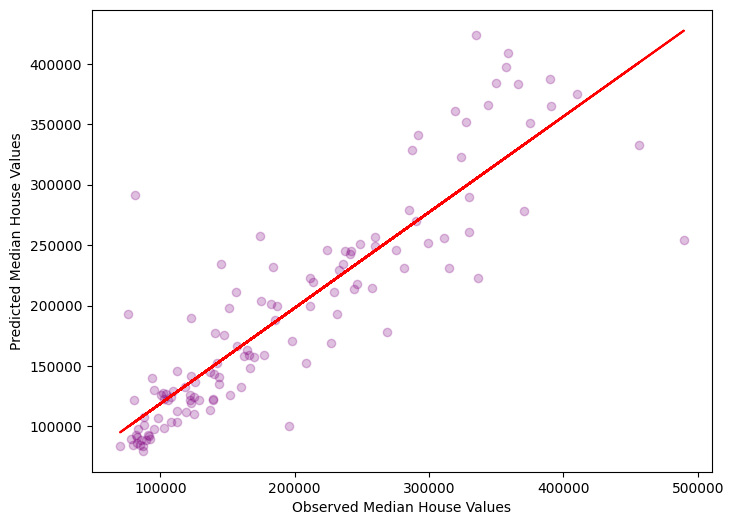

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_preds, c="purple", alpha=0.25)

# Adding trendline
z = np.polyfit(y_test, y_preds, 1)
p = np.poly1d(z)

plt.plot(y_test,p(y_test),"red")
plt.ylabel('Predicted Median House Values')
plt.xlabel('Observed Median House Values');

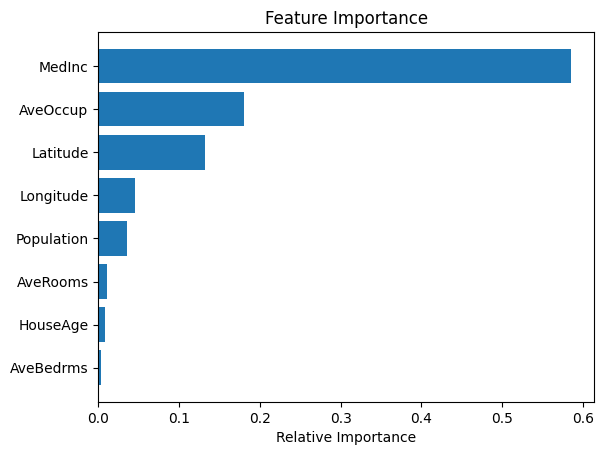

In [46]:
importance = loaded_model.feature_importances_
indices = range(len(importance))

# Rearranging feature names so they match our sorted feature importances
names = [housing.feature_names[i] for i in importance.argsort()]

# Plotting feature importance
plt.figure()
plt.title('Feature Importance')
plt.barh(indices, sorted(importance), align = 'center')
plt.yticks(indices, names)
plt.xlabel('Relative Importance')
plt.show()